In [2]:
from tensorflow.keras.datasets import mnist

c:\users\oztur\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\oztur\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\oztur\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\oztur\anaconda3\envs\deep_learning\lib\s

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

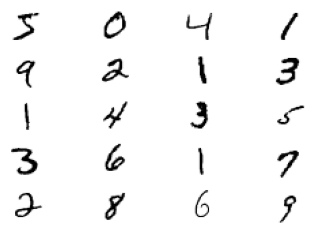

In [4]:
from matplotlib import pyplot as plt

for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')
    


In [5]:
xtrain.shape , xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
xtrain = xtrain.reshape(60000, 784)
xtest = xtest.reshape(10000, 784)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

In [8]:
xtrain.shape[1]

784

In [9]:
def create_model(x_train):
  model = Sequential()
  model.add(Dense(10, input_dim = x_train.shape[1],
                  activation = 'tanh'))
  model.add(Dense(50, activation='tanh'))
  model.add(Dropout(0.5))
  model.add(Dense(60, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(optimizer = sgd ,
                loss = 'categorical_crossentropy', 
                metrics=['accuracy'])

  return model

In [10]:
model = create_model(xtrain)
print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                550       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                3060      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                610       
Total params: 12,070
Trainable params: 12,070
Non-trainable params: 0
_________________________________________________________________


In [11]:
ytrain_ohe = to_categorical(ytrain)

In [12]:
history = model.fit(xtrain,
          ytrain_ohe,
          epochs = 50,
          batch_size = 500,
          validation_split = 0.1,
          verbose = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 1s 9us/sample - loss: 2.2607 - acc: 0.1597 - val_loss: 2.0233 - val_acc: 0.4270
Epoch 2/50
54000/54000 [==============================] - 0s 7us/sample - loss: 1.9839 - acc: 0.3167 - val_loss: 1.7710 - val_acc: 0.4668
Epoch 3/50
54000/54000 [==============================] - 0s 8us/sample - loss: 1.7555 - acc: 0.4193 - val_loss: 1.5215 - val_acc: 0.5557
Epoch 4/50
54000/54000 [==============================] - 0s 7us/sample - loss: 1.5374 - acc: 0.5056 - val_loss: 1.3056 - val_acc: 0.6055
Epoch 5/50
54000/54000 [==============================] - 0s 7us/sample - loss: 1.3336 - acc: 0.5813 - val_loss: 1.0914 - val_acc: 0.6982
Epoch 6/50
54000/54000 [==============================] - 0s 8us/sample - loss: 1.1874 - acc: 0.6253 - val_loss: 0.9454 - val_acc: 0.7515
Epoch 7/50
54000/54000 [==============================] - 0s 7us/sample - loss: 1.0759 - acc: 0.6633 - val_loss: 0.8479 - v

In [13]:
ytest_ohe = to_categorical(ytest)
score = model.evaluate(xtest, ytest_ohe, batch_size=500)
print(score)

10000/10000 [==============================] - 0s 4us/sample - loss: 0.4675 - acc: 0.8681
[0.46745994240045546, 0.8681]


In [14]:
print(model.predict(xtest[:10]))

[[3.26348527e-04 6.07762058e-06 3.37020203e-04 2.69780285e-03
  1.01505364e-04 1.65742385e-04 3.07987830e-05 9.84756887e-01
  2.33247469e-04 1.13445166e-02]
 [2.06266567e-02 8.18020140e-04 9.01732385e-01 5.88228554e-02
  1.64198005e-04 1.85269851e-03 1.43571524e-03 1.87524199e-03
  1.08556207e-02 1.81680953e-03]
 [3.96830510e-05 9.91434634e-01 5.31128282e-03 1.89427941e-04
  1.23926133e-04 5.99479361e-04 5.50932775e-04 8.29550845e-05
  1.55196094e-03 1.15717376e-04]
 [9.83846068e-01 1.10642308e-04 4.42715501e-03 2.22413661e-03
  4.66191050e-05 5.91689581e-03 2.57459446e-03 2.49362929e-04
  4.88740625e-04 1.16019393e-04]
 [1.80285788e-04 5.02987241e-04 1.14559149e-02 2.38436376e-04
  9.34875309e-01 1.57900853e-03 8.30793008e-03 3.79393483e-03
  1.23085070e-03 3.78354229e-02]
 [3.96830510e-05 9.91434634e-01 5.31128282e-03 1.89427941e-04
  1.23926133e-04 5.99479361e-04 5.50932775e-04 8.29550845e-05
  1.55196094e-03 1.15717376e-04]
 [2.42585465e-05 4.10495355e-04 1.54958933e-03 1.41486365e

In [15]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Text(0.5, 0, 'epoch')

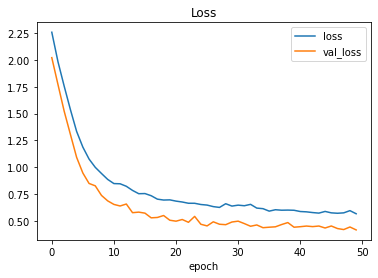

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

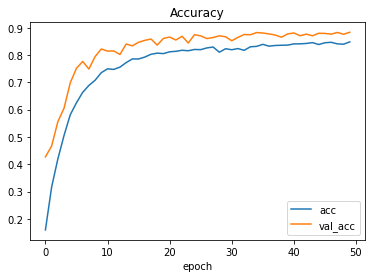

In [17]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [20]:
# serialize model
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
